In [8]:
!pip install tensorflow==2.12.0

In [9]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [10]:
%load_ext tensorboard

In [14]:
logdir = 'log'

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

11490434/11490434 [==============================] - 1s 0us/step


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [15]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.1480 - accuracy: 0.9537 - val_loss: 0.0557 - val_accuracy: 0.9821
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.0446 - val_accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0335 - accuracy: 0.9897 - val_loss: 0.0340 - val_accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0418 - val_accuracy: 0.9870
Epoch 5/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0313 - val_accuracy: 0.9909


In [19]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)


313/313 [==============================] - 7s 22ms/step


In [20]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

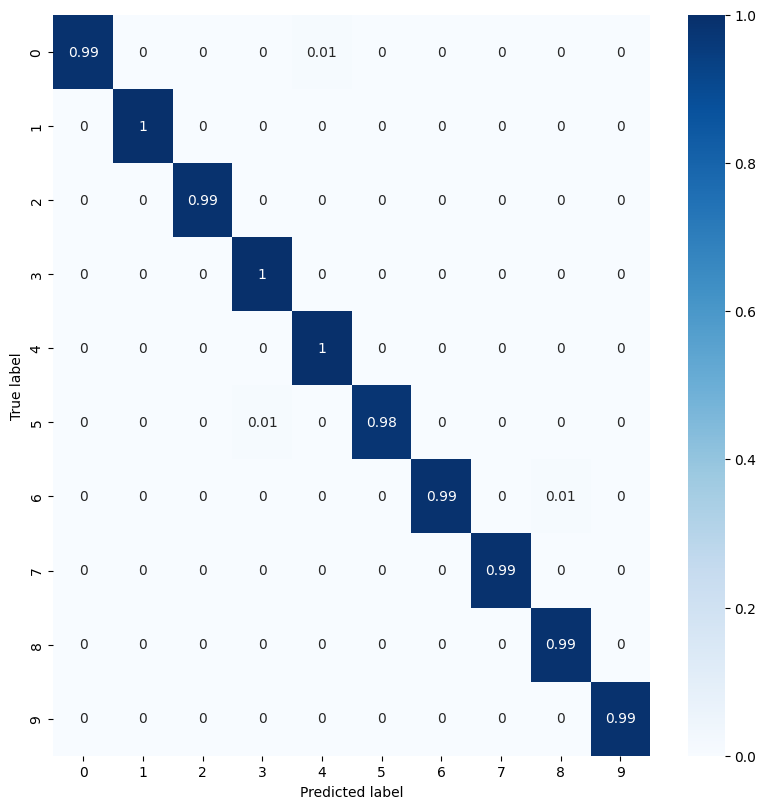

In [21]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
from sklearn.metrics import recall_score

sensibilidade = recall_score(y_true, y_pred, average='macro')
print("Sensibilidade:", sensibilidade)

Sensibilidade: 0.9906883225678668


In [23]:
from sklearn.metrics import accuracy_score

acurácia = accuracy_score(y_true, y_pred)
print("Acurácia:", acurácia)

Acurácia: 0.9909


In [24]:
from sklearn.metrics import f1_score

f1score = f1_score(y_true, y_pred, average='macro')
print("F1-Score:", f1score)

F1-Score: 0.990788673999781


313/313 [==============================] - 6s 19ms/step


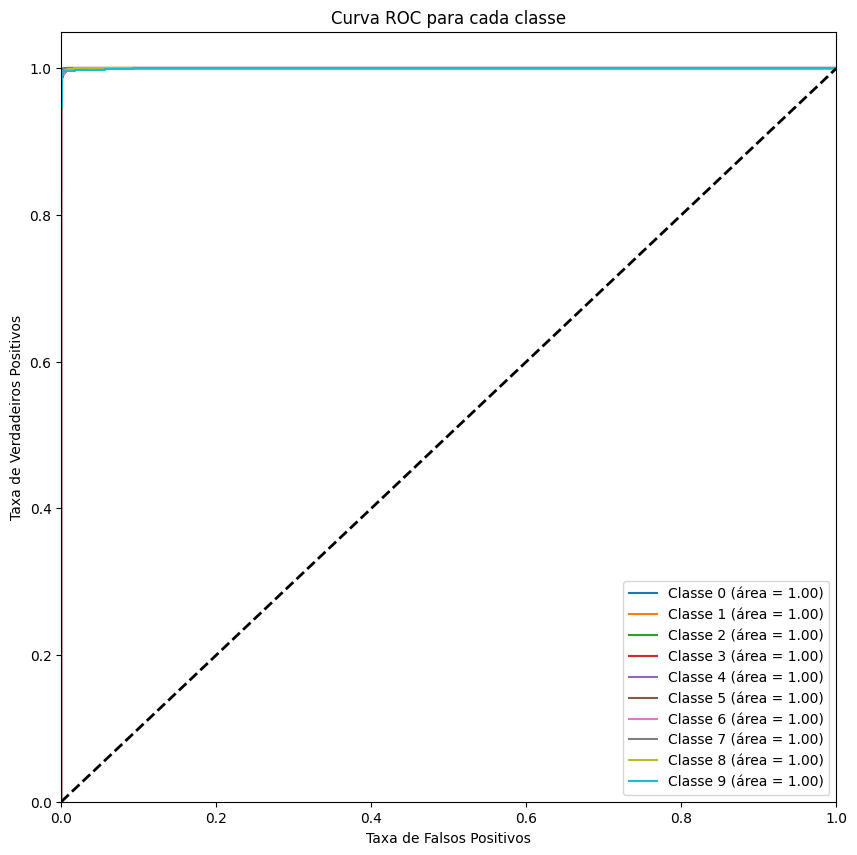

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_true_bin = label_binarize(y_true, classes=classes)
y_pred_prob = model.predict(test_images)

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'Classe {classes[i]} (área = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Taxa de Falsos Positivos')
ax.set_ylabel('Taxa de Verdadeiros Positivos')
ax.set_title('Curva ROC para cada classe')
ax.legend(loc="lower right")
plt.show()